<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Deploy_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split, \
GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, \
roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, make_scorer, recall_score, \
accuracy_score, precision_score, f1_score, average_precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#import qgrid
import numpy as np
from matplotlib import cm

In [52]:
bd_teste = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.xlsx")
bd_teste.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.csv",index = False)

In [53]:
bd_teste = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.csv",sep = ',',encoding = 'utf8')

In [55]:
bd_teste.shape

(21463, 20)

In [58]:
bd_teste['DIESEL'] = bd_teste['DIESEL'].apply({'N':0, 'S':1,'NN':0,'< 1':0,'<1':0,'> 10':1,'>10':1}.get)

In [59]:
bd_teste['DIESEL'] = bd_teste['DIESEL'].replace(r'^\s+$', np.nan, regex=True)

In [60]:
bd_teste = bd_teste.fillna({'DIESEL': 0})

In [61]:
for x in range (bd_teste.shape[0]):
  if bd_teste['TBN'][x]=='-':
    bd_teste['TBN'][x]= 0

In [62]:
bd_teste['TBN']=bd_teste['TBN'].astype(str).str.replace("," , ".").astype(float)

In [63]:
media = bd_teste['TBN'].mean()
bd_teste = bd_teste.fillna({'TBN': media})

In [64]:
for x in range (bd_teste.shape[0]):
  if bd_teste['VISCOSIDADE'][x]=='-':
    bd_teste['VISCOSIDADE'][x]= 0                   


In [65]:
bd_teste['VISCOSIDADE']=bd_teste['VISCOSIDADE'].astype(str).str.replace("," , ".").astype(float)

In [66]:
media = bd_teste['VISCOSIDADE'].mean()
bd_teste = bd_teste.fillna({'VISCOSIDADE': media})

In [67]:
for x in range (bd_teste.shape[0]):
  if bd_teste['ALUMINIO'][x]=='-':
    bd_teste['ALUMINIO'][x]= 0
    cont1=cont1+1
  if bd_teste['FERRO'][x]=='-':
    bd_teste['FERRO'][x]= 0
    cont2=cont2+1  
  if bd_teste['CROMO'][x]=='-':
    bd_teste['CROMO'][x]= 0
    cont3=cont3+1
  if bd_teste['CHUMBO'][x]=='-':
    bd_teste['CHUMBO'][x]= 0
    cont4=cont4+1
  if bd_teste['COBRE'][x]=='-':
    bd_teste['COBRE'][x]= 0
    cont5=cont5+1
  if bd_teste['ESTANHO'][x]=='-':
    bd_teste['ESTANHO'][x]= 0
    cont6=cont6+1
  if bd_teste['NIQUEL'][x]=='-':
    bd_teste['NIQUEL'][x]= 0
    cont7=cont7+1
  if bd_teste['PRATA'][x]=='-':
    bd_teste['PRATA'][x]= 0
    cont8=cont8+1  
  if bd_teste['SILICIO'][x]=='-':
    bd_teste['SILICIO'][x]= 0
    cont9=cont9+1
  if bd_teste['SODIO'][x]=='-':
    bd_teste['SODIO'][x]= 0
    cont10=cont10+1
  if bd_teste['AGUA'][x]=='-':
    bd_teste['AGUA'][x]= 0
    cont11=cont11+1
  if bd_teste['FULIGEM'][x]=='-':
    bd_teste['FULIGEM'][x]= 0
    cont12=cont12+1
  if bd_teste['OXIDACAO'][x]=='-':
    bd_teste['OXIDACAO'][x]= 0
    cont13=cont13+1
  if bd_teste['SULFATACAO'][x]=='-':
    bd_teste['SULFATACAO'][x]= 0
    cont14=cont14+1     

In [68]:
bd_teste['ALUMINIO'] = bd_teste['ALUMINIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['FERRO'] = bd_teste['FERRO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['CROMO'] = bd_teste['CROMO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['CHUMBO'] = bd_teste['CHUMBO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['COBRE'] = bd_teste['COBRE'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['ESTANHO'] = bd_teste['ESTANHO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['NIQUEL'] = bd_teste['NIQUEL'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['PRATA'] = bd_teste['PRATA'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SILICIO'] = bd_teste['SILICIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SODIO'] = bd_teste['SODIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['AGUA'] = bd_teste['AGUA'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['FULIGEM'] = bd_teste['FULIGEM'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['OXIDACAO'] = bd_teste['OXIDACAO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SULFATACAO'] = bd_teste['SULFATACAO'].replace(r'^\s+$', np.nan, regex=True)

In [69]:
bd_teste['ALUMINIO']=bd_teste['ALUMINIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['FERRO']=bd_teste['FERRO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['CROMO']=bd_teste['CROMO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['CHUMBO']=bd_teste['CHUMBO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['COBRE']=bd_teste['COBRE'].astype(str).str.replace("," , ".").astype(float)
bd_teste['ESTANHO']=bd_teste['ESTANHO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['NIQUEL']=bd_teste['NIQUEL'].astype(str).str.replace("," , ".").astype(float)
bd_teste['PRATA']=bd_teste['PRATA'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SILICIO']=bd_teste['SILICIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SODIO']=bd_teste['SODIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['AGUA']=bd_teste['AGUA'].astype(str).str.replace("," , ".").astype(float)
bd_teste['FULIGEM']=bd_teste['FULIGEM'].astype(str).str.replace("," , ".").astype(float)
bd_teste['OXIDACAO']=bd_teste['OXIDACAO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SULFATACAO']=bd_teste['SULFATACAO'].astype(str).str.replace("," , ".").astype(float)

In [70]:
media = bd_teste['ALUMINIO'].mean()
bd_teste = bd_teste.fillna({'ALUMINIO': media})
media = bd_teste['FERRO'].mean()
bd_teste = bd_teste.fillna({'FERRO': media})
media = bd_teste['CROMO'].mean()
bd_teste = bd_teste.fillna({'CROMO': media})
media = bd_teste['CHUMBO'].mean()
bd_teste = bd_teste.fillna({'CHUMBO': media})
media = bd_teste['COBRE'].mean()
bd_teste = bd_teste.fillna({'COBRE': media})
media = bd_teste['ESTANHO'].mean()
bd_teste = bd_teste.fillna({'ESTANHO': media})
media = bd_teste['NIQUEL'].mean()
bd_teste = bd_teste.fillna({'NIQUEL': media})
media = bd_teste['PRATA'].mean()
bd_teste = bd_teste.fillna({'PRATA': media})
media = bd_teste['SILICIO'].mean()
bd_teste = bd_teste.fillna({'SILICIO': media})
media = bd_teste['SODIO'].mean()
bd_teste = bd_teste.fillna({'SODIO': media})
media = bd_teste['AGUA'].mean()
bd_teste = bd_teste.fillna({'AGUA': media})
media = bd_teste['FULIGEM'].mean()
bd_teste = bd_teste.fillna({'FULIGEM': media})
media = bd_teste['OXIDACAO'].mean()
bd_teste = bd_teste.fillna({'OXIDACAO': media})
media = bd_teste['SULFATACAO'].mean()
bd_teste = bd_teste.fillna({'SULFATACAO': media})

In [71]:
colunas=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
        'TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN','TARGET']

valores = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bd_teste_corr = bd_teste.reindex(columns=bd_teste.columns.tolist() + colunas)   # add empty cols
bd_teste_corr[colunas] = valores  # multi-column assignment works for existing cols    

In [75]:
bd_teste_corr = bd_teste_corr[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN','TARGET']]

In [76]:
bd_teste.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO
0,1800337331,903437,2019-01-01,0.0,21.0,1.0,5.0,4.0,4.0,0.0,0.0,12.0,3.0,0,15.00,0.001495,8.540,0.69,0.14,0.23
1,1800311170,903619,2019-01-02,0.0,9.0,1.0,3.0,2.0,0.0,0.0,0.0,5.0,13.0,0,15.82,0.001679,6.964,0.33,0.16,0.21
2,1800311180,903307,2019-01-01,0.0,19.0,1.0,0.0,2.0,1.0,0.0,0.0,8.0,9.0,0,12.27,0.002293,4.881,0.21,0.15,0.19
3,1800311158,903820,2019-01-01,0.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0,14.90,0.001479,4.393,0.59,0.12,0.21
4,1800225344,903859,2019-01-08,0.0,20.0,1.0,4.0,3.0,0.0,0.0,0.0,7.0,0.0,0,16.73,0.002192,5.616,0.33,0.27,0.30


## **Cria colunas de taxas e limites**

In [77]:
analise_orig = bd_teste_corr

In [78]:
analise_orig['TX_ALUMINIO'] = analise_orig['TX_ALUMINIO'].astype(float)
analise_orig['TX_FERRO'] = analise_orig['TX_FERRO'].astype(float)
analise_orig['TX_CROMO'] = analise_orig['TX_CROMO'].astype(float)
analise_orig['TX_CHUMBO'] = analise_orig['TX_CHUMBO'].astype(float)
analise_orig['TX_COBRE'] = analise_orig['TX_COBRE'].astype(float)
analise_orig['TX_ESTANHO'] = analise_orig['TX_ESTANHO'].astype(float)
analise_orig['TX_PRATA'] = analise_orig['TX_PRATA'].astype(float)
analise_orig['TX_SILICIO'] = analise_orig['TX_SILICIO'].astype(float)
analise_orig['TX_SODIO'] = analise_orig['TX_SODIO'].astype(float)
analise_orig['LIM_DIESEL'] = analise_orig['LIM_DIESEL'].astype(float)
analise_orig['LIM_VISCOSIDADE'] = analise_orig['LIM_VISCOSIDADE'].astype(float)
analise_orig['LIM_AGUA'] = analise_orig['LIM_AGUA'].astype(float)
analise_orig['LIM_TBN'] = analise_orig['LIM_TBN'].astype(float)
analise_orig['LIM_FULIGEM'] = analise_orig['LIM_FULIGEM'].astype(float)
analise_orig['LIM_OXIDACAO'] = analise_orig['LIM_OXIDACAO'].astype(float)
analise_orig['LIM_SULFATACAO'] = analise_orig['LIM_SULFATACAO'].astype(float)

In [79]:
analise_orig['DT_COLETA']= pd.to_datetime(analise_orig['DT_COLETA'])#,format='%d-%m-%Y')

In [80]:
analise_orig=analise_orig.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)

In [81]:
analise_orig = analise_orig.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(5)

In [82]:
analise_orig.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
21435,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0,16.58,0.001937,6.392,0.41,0.15,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21443,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0,16.44,0.001892,6.897,0.45,0.13,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21450,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21454,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21429,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0,15.97,0.001554,8.105,0.33,0.10,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## **Calcula taxas**

In [83]:
analise_orig1 = analise_orig

colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO'] 

cont = 0
anterior = 0
a = analise_orig1.shape[0] 
analise_orig1['LOCO_analise'] = analise_orig1['LOCO_analise'].apply(str)
analise_orig1['DT_COLETA']= pd.to_datetime(analise_orig1['DT_COLETA'])

#a=50
for i in range(a):
  loco = analise_orig1['LOCO_analise'][i] 
  values=[loco]
  #print('loco ',loco)
  #filtered_df = bd[bd.LOCO_analise.isin(values)]
  filtered_df = analise_orig1[analise_orig1.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 4:
    
    if loco == anterior:
      cont = cont + 1
    if loco != anterior:
      cont = 0 

    #print(' cont(iloc na filtered) ',cont,'filtered_df shape ',filtered_df.shape[0] )  
    if (4+cont)<filtered_df.shape[0] and filtered_df.iloc[[4+cont]]['LOCO_analise'].values[0]==loco :
      
      dt_menor=filtered_df.iloc[[4+cont]]['DT_COLETA'].values[0] 
      dt_maior=filtered_df.iloc[[cont]]['DT_COLETA'].values[0]
      #dt_menor=filtered_df.iloc[[3+cont]]['DT_COLETA'] 
      #dt_maior=bd_teste_corr_2['DT_COLETA'][i]
      oneday = pd.Timedelta(days=1)
     
      dias = (abs((dt_maior - dt_menor)))/oneday
        
      #print(' Linha ',i,'dias ',dias)
      for k in range (len(colunas_TX)):
        tx = filtered_df.iloc[[cont]][colunas_FEAT[k]].values[0]-filtered_df.iloc[[4+cont]][colunas_FEAT[k]].values[0]
        #print('TX ',tx,'Coluna k ',k)
        #print('Resultado ',round((tx/(dias+1)),5))
        analise_orig1[colunas_TX[k]][i] = round((tx/(dias+1)),5)

    analise_orig1['LIM_DIESEL'][i]= analise_orig1['DIESEL'][i]
    analise_orig1['LIM_VISCOSIDADE'][i]= analise_orig1['VISCOSIDADE'][i]
    analise_orig1['LIM_AGUA'][i]= analise_orig1['AGUA'][i]
    analise_orig1['LIM_FULIGEM'][i]= analise_orig1['FULIGEM'][i]
    analise_orig1['LIM_OXIDACAO'][i]= analise_orig1['OXIDACAO'][i]
    analise_orig1['LIM_SULFATACAO'][i]= analise_orig1['SULFATACAO'][i]
    analise_orig1['LIM_TBN'][i]= analise_orig1['TBN'][i] 

    anterior = loco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

In [84]:
analise_orig1

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
21435,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0,16.58,0.001937,6.392,0.41,0.15,0.23,0.00105,0.02667,0.00193,0.00421,0.00368,0.01000,0.00000,0.01439,-0.00825,0.0,16.58,0.001937,0.41,0.15,0.23,6.392,0
21443,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0,16.44,0.001892,6.897,0.45,0.13,0.22,-0.00222,0.01586,-0.00364,0.00061,0.00162,-0.00657,-0.00848,-0.01081,-0.01364,0.0,16.44,0.001892,0.45,0.13,0.22,6.897,0
21450,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,0.04500,-0.20814,-0.02571,-0.18843,-0.03514,0.01100,0.00000,0.00986,0.02286,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,0
21454,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.02041,0.08163,0.02041,0.06122,0.02041,-0.02041,0.00000,0.02041,-0.08163,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,0
21429,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0,15.97,0.001554,8.105,0.33,0.10,0.19,0.00971,0.03883,0.00000,0.00971,0.00000,0.00000,0.00000,0.02913,0.02913,0.0,15.97,0.001554,0.33,0.10,0.19,8.105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2000291322,900952,2021-02-10,7.0,8.0,6.0,2.0,3.0,0.0,0.0,4.0,2.0,0,15.33,0.002307,9.173,0.17,0.08,0.16,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,15.33,0.002307,0.17,0.08,0.16,9.173,0
0,2000291181,900952,2021-01-27,6.0,7.0,6.0,0.0,3.0,0.0,0.0,5.0,2.0,0,15.27,0.002331,9.416,0.15,0.08,0.16,0.05042,0.00000,-0.00840,0.00840,0.00840,0.00000,0.00000,0.00000,-0.03361,0.0,15.27,0.002331,0.15,0.08,0.16,9.416,0
2,2000291137,900952,2020-12-20,1.0,8.0,6.0,1.0,3.0,0.0,0.0,4.0,5.0,0,14.71,0.002446,10.031,0.24,0.08,0.16,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,14.71,0.002446,0.24,0.08,0.16,10.031,0
4,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,4.0,5.0,0,15.23,0.002476,9.949,0.11,0.08,0.15,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,15.23,0.002476,0.11,0.08,0.15,9.949,0


## **Insere pesos nas colunas de taxas e limites**

In [85]:
analise_orig1_1 = analise_orig1

#NORMAL           MONITORAR   
#<15         >15   <45    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']

#'TX_FERRO','TX_CHUMBO','TX_PRATA'
         
cont = 0        


for x in range(len(analise_orig1_1)):
#for x in range(10):  
  
  for k in range (len(colunas_TX_COMUNS)):
    cont = 0
    #print('linha ',x)
    #print('n.coluna k ',k)
    #print( ' coluna ',colunas_TX_COMUNS[k])
    #print(' valor ',analise_orig1_1[colunas_TX_COMUNS[k]][x])
    if analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.15 and cont == 0:
      #print (' valor ', 1)
      analise_orig1_1[colunas_TX_COMUNS[k]][x] = 1
      cont = 1
      
    else:  
      if 0.15 <= analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.45 and cont == 0:
        #print (' valor ', 2)
        analise_orig1_1[colunas_TX_COMUNS[k]][x] = 2
        cont = 1
        
      else:
        if analise_orig1_1[colunas_TX_COMUNS[k]][x] >=0.45 and cont == 0:
          #print (' valor ', 2)
          analise_orig1_1[colunas_TX_COMUNS[k]][x] = 2
           
        
  cont = 0   
  if analise_orig1_1['TX_FERRO'][x] < 0.12 and cont == 0:
    analise_orig1_1['TX_FERRO'][x]= 1
    cont = 1
   
  else:  
    if 0.12 <= analise_orig1_1['TX_FERRO'][x] < 0.45 and cont == 0:
      analise_orig1_1['TX_FERRO'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_FERRO'][x] >= 0.45 and cont == 0:
        analise_orig1_1['TX_FERRO'][x]= 2
          
  #print('results 2',results)
  cont = 0
  if analise_orig1_1['TX_CHUMBO'][x] < 0.10 and cont == 0:
    analise_orig1_1['TX_CHUMBO'][x]= 1
    cont = 1
    
  else:  
    if 0.10 <= analise_orig1_1['TX_CHUMBO'][x] < 0.30 and cont == 0:
      analise_orig1_1['TX_CHUMBO'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_CHUMBO'][x] >= 0.30 and cont == 0:
        analise_orig1_1['TX_CHUMBO'][x]= 2
         
  cont = 0       
  #print('results 3',results)
  if analise_orig1_1['TX_PRATA'][x] < 0.05 and cont == 0:
    analise_orig1_1['TX_PRATA'][x]= 1
    cont = 1
    
  else:  
    if 0.05 <= analise_orig1_1['TX_PRATA'][x] < 0.15 and cont == 0:
      analise_orig1_1['TX_PRATA'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_PRATA'][x] >= 0.15 and cont == 0:
        analise_orig1_1['TX_PRATA'][x]= 2
          
  #print('results 4',results)
  cont = 0
  if analise_orig1_1['TX_SILICIO'][x] < 0.10 and cont == 0:
    analise_orig1_1['TX_SILICIO'][x]= 1
    cont = 1
    
  else:  
    if 0.10 <= analise_orig1_1['TX_SILICIO'][x] < 0.15 and cont == 0:
      analise_orig1_1['TX_SILICIO'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_SILICIO'][x] >= 0.15 and cont == 0:
        analise_orig1_1['TX_SILICIO'][x]= 2
       
  #print('results 5',results)   
  cont = 0
  if analise_orig1_1['LIM_TBN'][x] < 4 and cont == 0:
    analise_orig1_1['LIM_TBN'][x]= 2
    cont = 1
     
  if analise_orig1_1['LIM_TBN'][x] > 4 and cont == 0:
    analise_orig1_1['LIM_TBN'][x]= 1
    
  cont = 0  
  if analise_orig1_1['LIM_VISCOSIDADE'][x] < 12.6 and cont == 0:
    analise_orig1_1['LIM_VISCOSIDADE'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_VISCOSIDADE'][x] > 12.6 and cont == 0:
    analise_orig1_1['LIM_VISCOSIDADE'][x]= 1
     
  cont = 0  
  if analise_orig1_1['LIM_AGUA'][x] > 0.1 and cont == 0:
    analise_orig1_1['LIM_AGUA'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_AGUA'][x] < 0.1 and cont == 0:
    analise_orig1_1['LIM_AGUA'][x]= 1
      
  cont = 0  
  if analise_orig1_1['LIM_FULIGEM'][x] > 1 and cont == 0:
    analise_orig1_1['LIM_FULIGEM'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_FULIGEM'][x] < 1 and cont == 0:
    analise_orig1_1['LIM_FULIGEM'][x]= 1
      
  cont = 0  
  if analise_orig1_1['LIM_OXIDACAO'][x] > 5 and cont == 0:
    analise_orig1_1['LIM_OXIDACAO'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_OXIDACAO'][x] < 5 and cont == 0:
    analise_orig1_1['LIM_OXIDACAO'][x]= 1
      
  cont = 0  
  if analise_orig1_1['LIM_SULFATACAO'][x] > 5 and cont == 0:
    analise_orig1_1['LIM_SULFATACAO'][x]= 2
    cont = 1
     
  if analise_orig1_1['LIM_SULFATACAO'][x] < 5 and cont == 0:
    analise_orig1_1['LIM_SULFATACAO'][x]= 1
      
  analise_orig1_1['LIM_DIESEL'][x] = 1
  #print('results 6',results)  
  cont = 0
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to b

In [86]:
analise_orig1_1

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
21435,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0,16.58,0.001937,6.392,0.41,0.15,0.23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21443,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0,16.44,0.001892,6.897,0.45,0.13,0.22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21450,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21454,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21429,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0,15.97,0.001554,8.105,0.33,0.10,0.19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2000291322,900952,2021-02-10,7.0,8.0,6.0,2.0,3.0,0.0,0.0,4.0,2.0,0,15.33,0.002307,9.173,0.17,0.08,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
0,2000291181,900952,2021-01-27,6.0,7.0,6.0,0.0,3.0,0.0,0.0,5.0,2.0,0,15.27,0.002331,9.416,0.15,0.08,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2000291137,900952,2020-12-20,1.0,8.0,6.0,1.0,3.0,0.0,0.0,4.0,5.0,0,14.71,0.002446,10.031,0.24,0.08,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,4.0,5.0,0,15.23,0.002476,9.949,0.11,0.08,0.15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


## **Não executa **

In [ ]:
# TAXA DE CRESCIMENTO
#                 NORMAL     MONITORAR      
#'ALUMINIO'       <15         >15      
#'FERRO'          <12         >12       
#'CROMO'          <15         >15  
#'CHUMBO'         <10         >10  
#'COBRE'          <15         >15  
#'ESTANHO'        <15         >15  
#'PRATA'          <5          >5    
#'SILICIO'        <10         >10  
#'SODIO'          <15         >15   

# LIMITE          ACEITÁVEL 
#'TBN'               >4
#'VISCOSIDADE'       >12.6 e <18.4
#'AGUA'              <0.1
#'FULIGEM'           <1.0
#'OXIDACAO'          <5.0
#'SULFATACAO'        <5.0

# Pesos: NORMAL:1  MONITORAR:2 

In [ ]:
col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)

#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']
colunas_scr1=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO','SCR_FERRO','SCR_CHUMBO','SCR_PRATA',
             'SCR_SILICIO']
colunas_scr2=['SCR_TBN','SCR_VISCOSIDADE','SCR_AGUA','SCR_FULIGEM','SCR_OXIDACAO','SCR_SULFATACAO']
for w in range(bd_teste_corr_2.shape[0]):
  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'NORMAL'
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR'
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR' 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL' 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR' 
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR'   
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR' 
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'  
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK'  
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK'  
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK' 

  cont1=0;cont2=0
  for t1 in range (len(colunas_scr1)):
    if bd_teste_corr_2[colunas_scr1[t1]][w] == 'NORMAL':
      cont1=cont1+1

  for t2 in range (len(colunas_scr2)):
    if bd_teste_corr_2[colunas_scr2[t2]][w] == 'OK':
      cont2=cont2+1

  if cont1==9 and cont2==6:  
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'
  else:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MONITORAR'

# **Predição**

In [87]:
v1_v2_dataset = analise_orig1_1

In [88]:
v1_v2_dataset['TARGET'] = v1_v2_dataset.apply(lambda row: 1 if (row['TX_ALUMINIO'] == 2) or 
                                                               (row['TX_FERRO'] == 2) or
                                                               (row['TX_CROMO'] == 2) or 
                                                               (row['TX_CHUMBO'] == 2) or
                                                               (row['TX_COBRE'] == 2) or 
                                                               (row['TX_ESTANHO'] == 2) or
                                                               (row['TX_PRATA'] == 2) or 
                                                               (row['TX_SILICIO'] == 2) or
                                                               (row['TX_SODIO'] == 2) or 
                                                               (row['LIM_DIESEL'] == 2) or
                                                               (row['LIM_VISCOSIDADE'] == 2) or 
                                                               (row['LIM_AGUA'] == 2) or
                                                               (row['LIM_FULIGEM'] == 2) or 
                                                               (row['LIM_OXIDACAO'] == 2) or
                                                               (row['LIM_SULFATACAO'] == 2) or 
                                                               (row['LIM_TBN'] == 2) else 0, axis = 1)
v1_v2_dataset

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
21435,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0,16.58,0.001937,6.392,0.41,0.15,0.23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21443,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0,16.44,0.001892,6.897,0.45,0.13,0.22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21450,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21454,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0,16.18,0.001641,7.054,0.31,0.13,0.21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
21429,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0,15.97,0.001554,8.105,0.33,0.10,0.19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2000291322,900952,2021-02-10,7.0,8.0,6.0,2.0,3.0,0.0,0.0,4.0,2.0,0,15.33,0.002307,9.173,0.17,0.08,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
0,2000291181,900952,2021-01-27,6.0,7.0,6.0,0.0,3.0,0.0,0.0,5.0,2.0,0,15.27,0.002331,9.416,0.15,0.08,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2000291137,900952,2020-12-20,1.0,8.0,6.0,1.0,3.0,0.0,0.0,4.0,5.0,0,14.71,0.002446,10.031,0.24,0.08,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,4.0,5.0,0,15.23,0.002476,9.949,0.11,0.08,0.15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [99]:
v1_v2_dataset['TX_ALUMINIO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_ALUMINIO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_FERRO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_FERRO'] == 1)  else 'NOK',axis =1)                                                   
v1_v2_dataset['TX_CROMO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_CROMO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_CHUMBO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_CHUMBO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_COBRE'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_COBRE'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_ESTANHO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_ESTANHO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_PRATA'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_PRATA'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_SILICIO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_SILICIO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_SODIO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_SODIO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_DIESEL'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_DIESEL'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_VISCOSIDADE'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_VISCOSIDADE'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_AGUA'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_AGUA'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_FULIGEM'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_FULIGEM'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_OXIDACAO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_OXIDACAO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_SULFATACAO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_SULFATACAO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_TBN'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_TBN'] == 1)  else 'NOK',axis =1)


In [106]:
v1_v2_dataset['TX_ALUMINIO'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['TX_FERRO'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)                                                   
v1_v2_dataset['TX_CROMO'] = v1_v2_dataset.apply(lambda row: 'OK' if 1  else 'NOK',axis =1)
v1_v2_dataset['TX_CHUMBO'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['TX_COBRE'] = v1_v2_dataset.apply(lambda row: 'OK' if 1  else 'NOK',axis =1)
v1_v2_dataset['TX_ESTANHO'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['TX_PRATA'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['TX_SILICIO'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['TX_SODIO'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['LIM_DIESEL'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['LIM_VISCOSIDADE'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['LIM_AGUA'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['LIM_FULIGEM'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)
v1_v2_dataset['LIM_OXIDACAO'] = v1_v2_dataset.apply(lambda row: 'OK' if 1  else 'NOK',axis =1)
v1_v2_dataset['LIM_SULFATACAO'] = v1_v2_dataset.apply(lambda row: 'OK' if 1  else 'NOK',axis =1)
v1_v2_dataset['LIM_TBN'] = v1_v2_dataset.apply(lambda row: 'OK' if  1  else 'NOK',axis =1)

In [100]:
v1_v2_dataset['TARGET'].value_counts()

0    16809
1     4654
Name: TARGET, dtype: int64

In [110]:
import pickle
file_name = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/model_2cl.pkl"
# Carrega modelo
model_2cl = pickle.load(open(file_name, "rb"))
clf = model_2cl

In [111]:
colunas = ['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE','TBN','FULIGEM','OXIDACAO','SULFATACAO']

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     16809
           1       0.60      0.63      0.61      4654

    accuracy                           0.83     21463
   macro avg       0.75      0.76      0.75     21463
weighted avg       0.83      0.83      0.83     21463

Test Data:
0    78.316172
1    21.683828
Name: TARGET, dtype: float64
--------------------------------------------------
Predicted Data Before:
0    77.202628
1    22.797372
Name: 0, dtype: float64


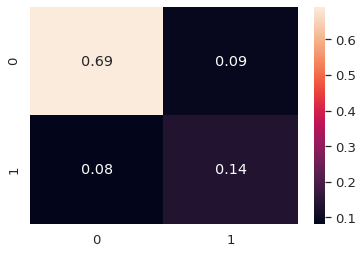

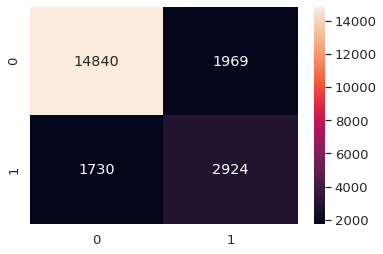

In [101]:
testy_2 = v1_v2_dataset['TARGET']
testX_2 = v1_v2_dataset[colunas]

cutoff_point = 0.65

preds = clf.predict_proba(testX_2)
#preds = pd.DataFrame([1 if y >= 0.5 else 0 for y in preds[:, 1]]) # cutoff_point 
preds = pd.DataFrame([1 if y >= cutoff_point else 0 for y in preds[:, 1]]) # cutoff_point

print(classification_report(testy_2, preds))

print("Test Data:")
print(testy_2.value_counts(normalize = True)*100)
print("-"*50)
print("Predicted Data Before:")
print(preds[0].value_counts(normalize = True)*100)


sns.set(font_scale=1.2)
plt.figure(figsize=(6,4))

cm = confusion_matrix(testy_2, preds, normalize = 'all')
sns.heatmap(cm,annot=True,fmt='.2f')
#ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()

sns.set(font_scale=1.2)
plt.figure(figsize=(6,4))


cm = confusion_matrix(testy_2, preds)
sns.heatmap(cm,annot=True,fmt='.0f')

In [112]:
prediction_threshold = cutoff_point
preds = clf.predict_proba(testX_2)
#predictions = pd.DataFrame({"LOCO_analise": v1_v2_dataset["LOCO_analise"], 
#                            "NU_ANLS_OLEO": v1_v2_dataset["NU_ANLS_OLEO"], 
#                            "pred_probability": np.round(preds[:, 1], 3), 
#                            "loco_predicted_monitoring": np.where(preds[:, 1] > prediction_threshold, 1, 0)})

predictions = pd.DataFrame({"Probabilidade de Predição": np.round(preds[:, 1], 3), 
                            "Resultado da Predição": np.where(preds[:, 1] > prediction_threshold, 1, 0)})


predictions_2 = pd.concat([v1_v2_dataset, predictions], axis = 1)
predictions_2

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET,Probabilidade de Predição,Resultado da Predição
0,2000291181,900952,2021-01-27,6.00,7.00,6.00,0.00,3.00,0.00,0.00,5.00,2.00,0,15.27,0.002331,9.416000,0.15,0.0800,0.160000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.026,0
1,2000291322,900952,2021-02-10,7.00,8.00,6.00,2.00,3.00,0.00,0.00,4.00,2.00,0,15.33,0.002307,9.173000,0.17,0.0800,0.160000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.022,0
2,2000291137,900952,2020-12-20,1.00,8.00,6.00,1.00,3.00,0.00,0.00,4.00,5.00,0,14.71,0.002446,10.031000,0.24,0.0800,0.160000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.009,0
3,2000290046,900952,2020-10-15,1.00,8.00,7.00,1.00,2.00,0.00,0.00,4.00,6.00,0,15.17,0.002512,10.005000,0.11,0.0800,0.150000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.009,0
4,2000290106,900952,2020-10-16,1.00,8.00,6.00,2.00,2.00,0.00,0.00,4.00,5.00,0,15.23,0.002476,9.949000,0.11,0.0800,0.150000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21458,R-87979,907352,2019-05-21,1.13,3.51,0.11,1.48,0.27,0.45,0.00,13.96,0.67,0,15.72,0.002173,6.411353,0.70,0.0088,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,1,0.041,0
21459,R-93207,907352,2019-12-06,2.38,5.37,0.38,0.83,1.04,0.65,0.01,4.33,1.55,0,15.54,0.002173,6.411353,0.30,0.0710,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.041,0
21460,R-98388,907352,2020-05-17,1.84,4.79,0.21,0.79,0.53,0.67,0.00,4.27,1.90,0,15.39,0.002173,6.411353,0.40,0.0685,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.043,0
21461,R-96256,907352,2020-03-18,1.74,2.96,0.09,0.15,0.23,0.53,0.01,2.45,1.58,0,15.00,0.002173,6.411353,0.20,0.0378,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,0,0.042,0


In [113]:
predictions_2['TARGET'] = predictions_2.apply(lambda row: 'NORMAL' if (row['TARGET'] == 0)  else 'MONITORAR',axis =1)

In [114]:
predictions_2

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET,Probabilidade de Predição,Resultado da Predição
0,2000291181,900952,2021-01-27,6.00,7.00,6.00,0.00,3.00,0.00,0.00,5.00,2.00,0,15.27,0.002331,9.416000,0.15,0.0800,0.160000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.026,0
1,2000291322,900952,2021-02-10,7.00,8.00,6.00,2.00,3.00,0.00,0.00,4.00,2.00,0,15.33,0.002307,9.173000,0.17,0.0800,0.160000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.022,0
2,2000291137,900952,2020-12-20,1.00,8.00,6.00,1.00,3.00,0.00,0.00,4.00,5.00,0,14.71,0.002446,10.031000,0.24,0.0800,0.160000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.009,0
3,2000290046,900952,2020-10-15,1.00,8.00,7.00,1.00,2.00,0.00,0.00,4.00,6.00,0,15.17,0.002512,10.005000,0.11,0.0800,0.150000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.009,0
4,2000290106,900952,2020-10-16,1.00,8.00,6.00,2.00,2.00,0.00,0.00,4.00,5.00,0,15.23,0.002476,9.949000,0.11,0.0800,0.150000,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21458,R-87979,907352,2019-05-21,1.13,3.51,0.11,1.48,0.27,0.45,0.00,13.96,0.67,0,15.72,0.002173,6.411353,0.70,0.0088,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,MONITORAR,0.041,0
21459,R-93207,907352,2019-12-06,2.38,5.37,0.38,0.83,1.04,0.65,0.01,4.33,1.55,0,15.54,0.002173,6.411353,0.30,0.0710,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.041,0
21460,R-98388,907352,2020-05-17,1.84,4.79,0.21,0.79,0.53,0.67,0.00,4.27,1.90,0,15.39,0.002173,6.411353,0.40,0.0685,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.043,0
21461,R-96256,907352,2020-03-18,1.74,2.96,0.09,0.15,0.23,0.53,0.01,2.45,1.58,0,15.00,0.002173,6.411353,0.20,0.0378,0.253782,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK,NORMAL,0.042,0
